In [6]:
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

In [7]:
data = pd.read_csv('Cars93.csv')
subset_data = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]

In [9]:
linear = sklearn.linear_model.LinearRegression()
x1 = data['MPG.highway'].values.reshape(-1,1)
x2 = data['Turn.circle'].values.reshape(-1,1)
y = data['Price'].values.reshape(-1,1)

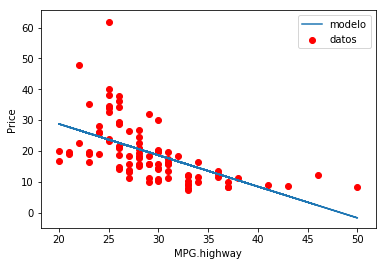

In [13]:
linear.fit(x1,y)
y_predict = linear.predict(x1)
plt.plot(x1, y_predict, label='modelo')
plt.scatter(x1, y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')

In [15]:
print(linear.score(x1, y))

-2.6110982762069135


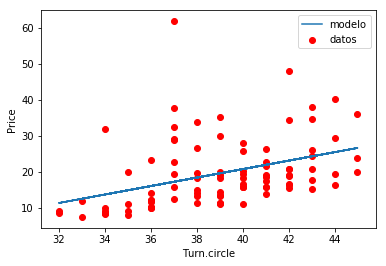

In [14]:
linear.fit(x2,y)
y_predict = linear.predict(x2)
plt.plot(x2, y_predict, label='modelo')
plt.scatter(x2, y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

In [16]:
print(linear.score(x2, y))

0.15412685056314568


Dado el indice de $R^2$, el modelo de Horsepower se ajusta mejor.

In [19]:
x = data[['Horsepower', 'MPG.highway']]
xx = data[['Horsepower','Turn.circle']]
xxx = data[['MPG.highway','Turn.circle']]
y = data['Price'].values.reshape(-1,1)

Horsepower and MPG.highway

In [30]:
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

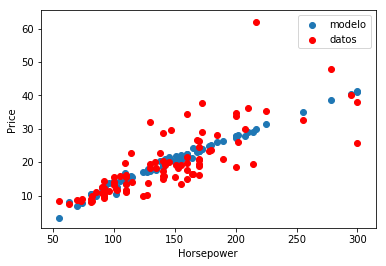

In [31]:
y_predict = linear.predict(x)
plt.scatter(x.Horsepower, y_predict, label='modelo')
plt.scatter(x.Horsepower, y, label='datos', color='red')
plt.legend()
plt.xlabel('Horsepower')
_ = plt.ylabel('Price')

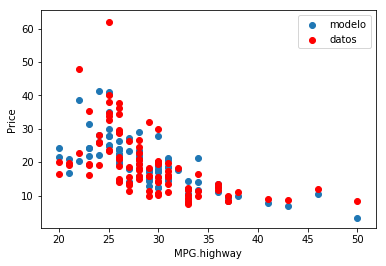

In [32]:
y_predict = linear.predict(x)
plt.scatter(x['MPG.highway'], y_predict, label='modelo')
plt.scatter(x['MPG.highway'], y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')

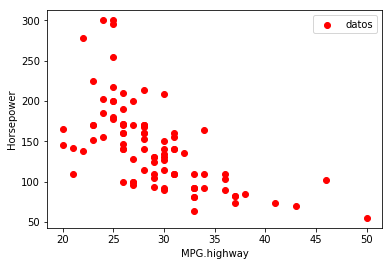

In [61]:
plt.scatter(x['MPG.highway'], x['Horsepower'], label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Horsepower')

In [33]:
print(linear.score(x,y))

0.6298653021343151


Horsepower and Turn.circle

In [44]:
linear.fit(xx,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

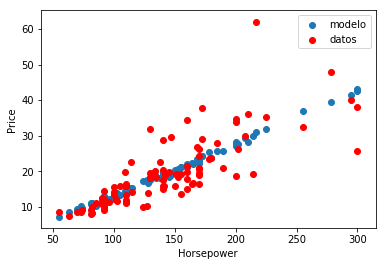

In [45]:
y_predict = linear.predict(xx)
plt.scatter(xx['Horsepower'], y_predict, label='modelo')
plt.scatter(xx['Horsepower'], y, label='datos', color='red')
plt.legend()
plt.xlabel('Horsepower')
_ = plt.ylabel('Price')

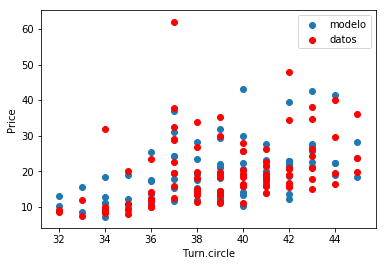

In [46]:
y_predict = linear.predict(xx)
plt.scatter(xx['Turn.circle'], y_predict, label='modelo')
plt.scatter(xx['Turn.circle'], y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

In [47]:
print(linear.score(xx,y))

0.6249029173886568


MPG.highway and Turn.circle

In [49]:
linear.fit(xxx,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

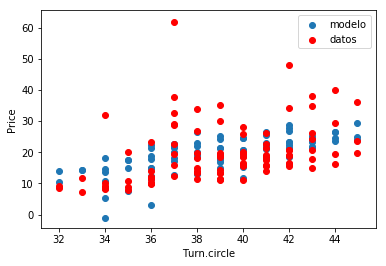

In [50]:
y_predict = linear.predict(xxx)
plt.scatter(xxx['Turn.circle'], y_predict, label='modelo')
plt.scatter(xxx['Turn.circle'], y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

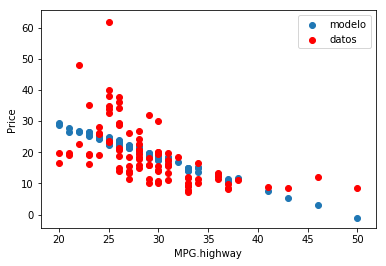

In [51]:
y_predict = linear.predict(xxx)
plt.scatter(xxx['MPG.highway'], y_predict, label='modelo')
plt.scatter(xxx['MPG.highway'], y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')

In [52]:
print(linear.score(xxx,y))

0.3198708229328999


Teniendo en cuenta el $R^2$, el mejor modelo es el primero, el cual utiliza Horsepower and MPG.highway.

Modelo dados los 3 datos

In [53]:
x4 = data[['Horsepower','MPG.highway','Turn.circle']]
y = data['Price'].values.reshape(-1,1)

In [54]:
linear.fit(x4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

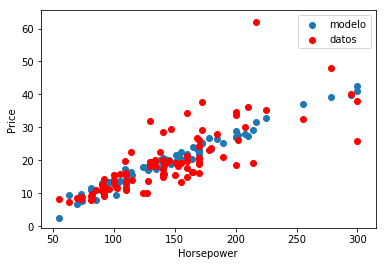

In [55]:
y_predict = linear.predict(x4)
plt.scatter(x4['Horsepower'], y_predict, label='modelo')
plt.scatter(x4['Horsepower'], y, label='datos', color='red')
plt.legend()
plt.xlabel('Horsepower')
_ = plt.ylabel('Price')

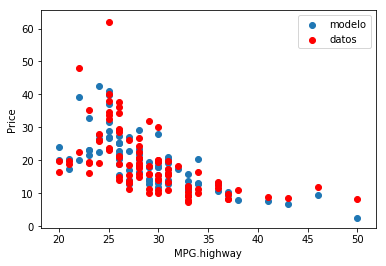

In [56]:
y_predict = linear.predict(x4)
plt.scatter(x4['MPG.highway'], y_predict, label='modelo')
plt.scatter(x4['MPG.highway'], y, label='datos', color='red')
plt.legend()
plt.xlabel('MPG.highway')
_ = plt.ylabel('Price')

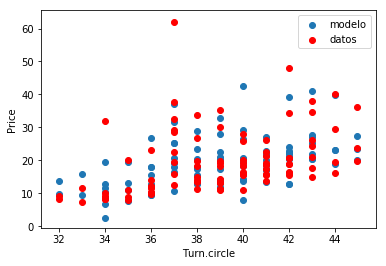

In [57]:
y_predict = linear.predict(x4)
plt.scatter(xxx['Turn.circle'], y_predict, label='modelo')
plt.scatter(xxx['Turn.circle'], y, label='datos', color='red')
plt.legend()
plt.xlabel('Turn.circle')
_ = plt.ylabel('Price')

In [58]:
print(linear.score(x4,y))

0.6404523210544848


Dado el valor de $R^2$ este es el mejor modelo.


Evidencia bayesiana para todos los modelos

In [66]:
#Modelo 1:Horsepower
import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

data = pd.read_csv('Cars93.csv')
subset_data = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]
N3 = 1000
b0 = -1.39
b1 = 0.14
gb0 = np.random.uniform(-1.39-5,-1.39+5,N3)
gb1 = np.random.uniform(0.14-5,0.14+5,N3)

def model(x,b0,b1):
    m = b0 + b1*np.array(subset_data.Horsepower)
    return m

def lk(x,y,b0,b1):
    y_model = model(x, b0,b1)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i])
    return np.sum(lks)/N3

pm1d = montecarlo(N3,gb0,gb1)

In [68]:
pm1d

-3.442560061711837e+84

In [91]:
#Modelo2: Turn circle
N3 = 1000
b0 = -26.32
b1 = 1.17
gb0 = np.random.uniform(b0-5,b0+5,N3)
gb1 = np.random.uniform(b1-5,+b1+5,N3)

def model(x,b0,b1):
    m = b0 + b1*np.array(subset_data['Turn.circle'])
    return m

def lk(x,y,b0,b1):
    y_model = model(x, b0,b1)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i])
    return np.sum(lks)/N3

pm2d = montecarlo(N3,gb0,gb1)

In [92]:
pm2d

-538203242539.9515

In [76]:
#Modelo3:MPG highway
N3 = 1000
b0 = -49.05
b1 = -1.015
gb0 = np.random.uniform(b0-5,b0+5,N3)
gb1 = np.random.uniform(b1-5,+b1+5,N3)

def model(x,b0,b1):
    m = b0 + b1*np.array(subset_data['MPG.highway'])
    return m

def lk(x,y,b0,b1):
    y_model = model(x, b0,b1)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i])
    return np.sum(lks)/N3

pm3d = montecarlo(N3,gb0,gb1)

In [77]:
pm3d

-3.1181143620136587e+19

In [80]:
N3 = 1000
b0 = 6.75
b1 = 0.13
b2 = 0.21
gb0 = np.random.uniform(b0-5,b0+5,N3)
gb1 = np.random.uniform(b1-5,+b1+5,N3)
gb2 = np.random.uniform(b2-5,+b2+5,N3)

def model(x,b0,b1,b2):
    m = b0 + b1*np.array(subset_data['Horsepower']) + b2*np.array(subset_data['MPG.highway'])
    return m

def lk(x,y,b0,b1,b2):
    y_model = model(x, b0,b1,b2)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1,gb2):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i],gb2[i])
    return np.sum(lks)/N3

pm4d = montecarlo(N3,gb0,gb1,gb2)

In [81]:
pm4d

-3.5636617320452705e+88

In [84]:
N3 = 1000
b0 = 6.001
b1 = 0.1528
b2 = -0.2177
gb0 = np.random.uniform(b0-5,b0+5,N3)
gb1 = np.random.uniform(b1-5,+b1+5,N3)
gb2 = np.random.uniform(b2-5,+b2+5,N3)

def model(x,b0,b1,b2):
    m = b0 + b1*np.array(subset_data['Horsepower']) + b2*np.array(subset_data['Turn.circle'])
    return m

def lk(x,y,b0,b1,b2):
    y_model = model(x, b0,b1,b2)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1,gb2):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i],gb2[i])
    return np.sum(lks)/N3

pm5d = montecarlo(N3,gb0,gb1,gb2)

In [85]:
pm5d

-1.375235195281392e+93

In [86]:
N3 = 1000
b0 = 35.40
b1 = -0.916
b2 = 0.276
gb0 = np.random.uniform(b0-5,b0+5,N3)
gb1 = np.random.uniform(b1-5,+b1+5,N3)
gb2 = np.random.uniform(b2-5,+b2+5,N3)

def model(x,b0,b1,b2):
    m = b0 + b1*np.array(subset_data['MPG.highway']) + b2*np.array(subset_data['Turn.circle'])
    return m

def lk(x,y,b0,b1,b2):
    y_model = model(x, b0,b1,b2)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1,gb2):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i],gb2[i])
    return np.sum(lks)/N3

pm6d = montecarlo(N3,gb0,gb1,gb2)

In [87]:
pm6d

-1.0094392729430974e+22

In [89]:
N3 = 1000
b0 = 24.1420
b1 = 0.1396
b2 = 0.3108
b3 = -0.4022
gb0 = np.random.uniform(b0-5,b0+5,N3)
gb1 = np.random.uniform(b1-5,+b1+5,N3)
gb2 = np.random.uniform(b2-5,+b2+5,N3)
gb3 = np.random.uniform(b3-5,+b3+5,N3)

def model(x,b0,b1,b2,b3):
    m = b0 + b1*np.array(subset_data['Horsepower']) +b2*np.array(subset_data['MPG.highway']) + b3*np.array(subset_data['Turn.circle'])
    return m

def lk(x,y,b0,b1,b2,b3):
    y_model = model(x, b0,b1,b2,b3)
    p = y_model * np.exp(-(y_model/y))
    p = p/(y**2)
    return np.sum(p)

def montecarlo(N3,gb0,gb1,gb2,gb3):
    lks = np.ones(N3)
    for i in range(N3):
        lks[i] = lk(x,y,gb0[i],gb1[i],gb2[i],gb3[i])
    return np.sum(lks)/N3

pm7d = montecarlo(N3,gb0,gb1,gb2,gb3)

In [90]:
pm7d

-5.616544228668213e+98